In [3]:
using DataFrames, CSV, Measurements, Unitful, Statistics
UNITFUL_FANCY_EXPONENTS = false # helps display better on graphs
using Interpolations
using Plots
using LaTeXStrings
using StringEncodings
using UnitfulLatexify
using MathTeXEngine
# https://github.com/JuliaPhysics/PhysicalConstants.jl

In [4]:
scalefontsizes(1.2) # Makes all fonts larger. 
# ^ Repeatedly calling this keeps scaling the font, so we set it aside.

In [5]:
Plots.gr()
#Plots.plotlyjs()
#Plots.pythonplot() # Important for working with unitful units
default(fontfamily = "Helvetica", #"Computer Modern", # Serif,
        framestyle = :box,
        grid = false,
        label = nothing, # Disables the default label that appears.
        linewidth = 2,
        #ticks = :native, # Allows interactive zooming with appropriate tick marks.
        #size = 1500 .* (3/2, 1),
        palette = :Paired_10, # https://docs.juliaplots.org/latest/generated/colorschemes/
        title_align = :left,
        titlefontvalign = :top,
        legendposition = :topright,
        size = [920, 690],
        margin = (10, :px),
        )
# https://discourse.julialang.org/t/nice-fonts-with-plots-gr-and-latexstrings/60037/4

In [6]:
c = u"c0";

In [7]:
f_from_λ(λ) = u"Hz"(c / λ)
λ_from_f(f) = u"nm"(c / f)

λ_from_f (generic function with 1 method)

In [11]:
# Constants.
λ_toptica = (399)u"nm";
λ_from_f(1u"MHz")

2.99792458e11 nm

Unitful.NoUnits(N_Yb) = 3.4802e18 ± 2.0e14
ρ_Yb = 1.77245e17 ± 1.0e13 cm⁻³


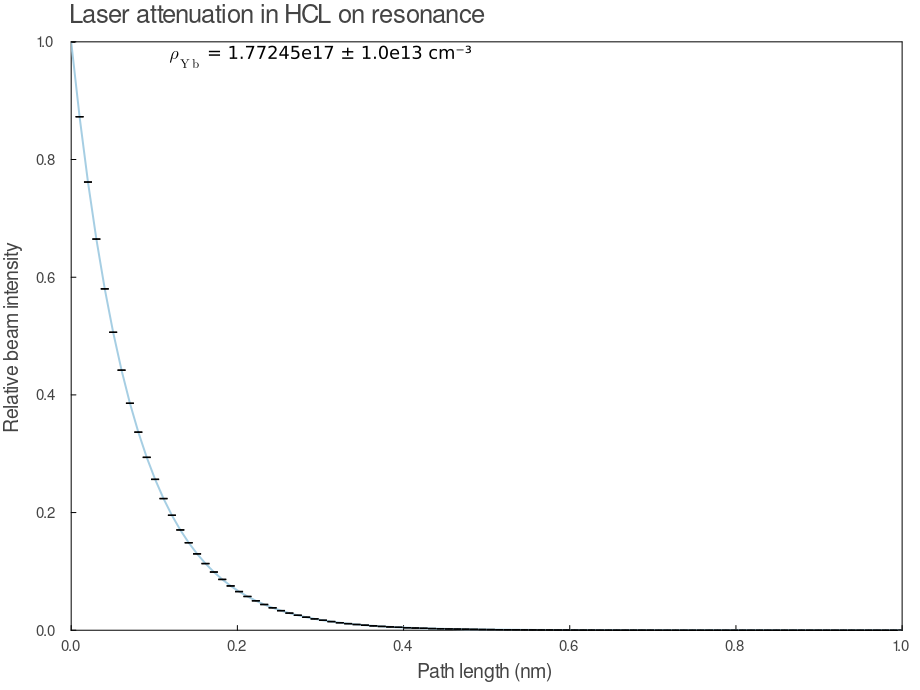

In [57]:
HCL_diameter = 50u"mm"
HCL_length = 10u"mm" # Guess.
HCL_mass_Yb = 1u"mg" # Guess.
m_Yb = (173.04 ± 0.01)u"u"; # Atomic mass of Yb in atomic mass units. https://physics.nist.gov/PhysRefData/Handbook/Tables/ytterbiumtable1.htm.
v0_fraction = 1 # The proportion of gas atoms that will have approximately 0 mass. Given by thermal distribution.
N_Yb = HCL_mass_Yb * v0_fraction / m_Yb
@show Unitful.NoUnits(N_Yb)
ρ_Yb = (N_Yb) / (HCL_length * π/4 * HCL_diameter^2) |> u"cm^-3"
@show ρ_Yb
σ(λ) = 3 * λ^2 / (2π)
I_relative(z, λ, ρ) = exp(-σ(λ) * ρ * z)
zs = range(0u"nm", 1u"nm", length = 100)
plot(zs, I_relative.(zs, λ_toptica, ρ_Yb),
    xlims = (0, :auto),
    ylims = (0, :auto),
    title = "Laser attenuation in HCL on resonance",
    ylabel = "Relative beam intensity",
    xlabel = "Path length")
    
annotate!((0.30, 0.97), Plots.text("\$ρ_\\mathrm{Yb}\$ = $ρ_Yb", 12, :black, :center)) # Passing tuple position forces it to be in relative positions